In [1]:
# John     12      3.5      Good
# Adam     18      3.8      Good
# Smith    17      2.4      Average
# Arnold   19      3.5      Average


In [2]:
import pandas as pd

df=pd.read_csv('/home/harshit/DataSets/Titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.head(10)[['Gender','Survived']]

,Gender,Survived
0,male,0
1,female,1
2,female,1
3,female,1
4,male,0
5,male,0
6,male,0
7,male,0
8,female,1
9,female,1


In [4]:
df[['Gender','Survived']].value_counts()

Gender  Survived
male    0           468
female  1           233
male    1           109
female  0            81
dtype: int64

In [5]:
df[['Gender','Pclass','Survived']].value_counts(normalize=True)

Gender  Pclass  Survived
male    3       0           0.336700
        2       0           0.102132
female  1       1           0.102132
male    1       0           0.086420
female  3       1           0.080808
                0           0.080808
        2       1           0.078563
male    3       1           0.052750
        1       1           0.050505
        2       1           0.019080
female  2       0           0.006734
        1       0           0.003367
dtype: float64

In [6]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df=df[['Gender','Pclass','Survived']]
df

,Gender,Pclass,Survived
0,male,3,0
1,female,1,1
2,female,3,1
3,female,1,1
4,male,3,0
...,...,...,...
886,male,2,0
887,female,1,1
888,female,3,0
889,male,1,1


In [8]:
df.replace({ 'male':0, 'female':1 },inplace=True) #encoding

/home/harshit/.local/lib/python3.8/site-packages/pandas/core/frame.py:4383: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [9]:
features=df[['Gender','Pclass']]
target=df[['Survived']]

In [10]:
df

,Gender,Pclass,Survived
0,0,3,0
1,1,1,1
2,1,3,1
3,1,1,1
4,0,3,0
...,...,...,...
886,0,2,0
887,1,1,1
888,1,3,0
889,0,1,1


In [11]:
pd.crosstab(df['Gender'],df['Pclass'])

Pclass,1,2,3
Gender,,,
0,122,108,347
1,94,76,144


In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features,target, test_size=0.25,random_state=10)

In [13]:
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier()

In [14]:
model.fit(x_train,y_train)
model.score(x_train,y_train)

0.7769461077844312

In [15]:
predicted=pd.DataFrame( model.predict(x_test),columns=['Predicted Value'] )

In [16]:
y_test.reset_index(drop=True,inplace=True)
y_test

,Survived
0,0
1,0
2,0
3,1
4,1
...,...
218,0
219,0
220,1
221,0


In [17]:
ans=pd.concat([predicted, y_test],axis=1)
ans

,Predicted Value,Survived
0,0,0
1,0,0
2,0,0
3,1,1
4,1,1
...,...,...
218,0,0
219,0,0
220,1,1
221,0,0


In [18]:
from sklearn.metrics import accuracy_score

accuracy_score(predicted, y_test)

0.8161434977578476

Empty DataFrame
Columns: []
Index: [(0, 0), (0, 1), (1, 0), (1, 1)]

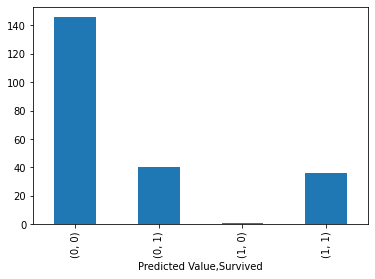

In [19]:
temp=ans.groupby([x for x in ans.columns])
temp.size().plot.bar()
temp.sum()

In [20]:
from sklearn.metrics import confusion_matrix

confusion_matrix(predicted, y_test)

array([[146,  40],
       [  1,  36]])

In [21]:
# True Positive    False Positive

# False Negatives  True Negatives

In [22]:
# 121---> 121 values classified as 1 were indeed 1

# 61----> 61 values were reported as positive i.e 1 by the model BUT THEY WERE 0 in reality




In [23]:
# #precision----> TP
#              -------------  = 121/ (121+61)
#                TP + FP
        
# #it specifies how many positive reported cases WERE ACTUALLY CORRECT?

In [24]:
121/ (121+61)
#for all passengers reported as surviving----> 66 % cases were correct

0.6648351648351648

In [25]:
# #what proportion of the actual positives was identified correctly?

# recall---->               TP
#                  ----------------------        = 
#                         TP +  FN

In [26]:
121/(121+26)

0.8231292517006803

In [27]:
# credit Rating                  Liability
#                     Normal   High    Total
    
# ------------------------------------------------------
# Excellent            3        1          4
# Good                 4        2          6  
# Poor                 0         4         4
# Total                7         7         14

In [28]:
# Entropy( Liability) =       7                          7      
#                         -  -----log2(7/14)     -   --------log(7/14)
#                             14                          14
        
        
#                   = 1

In [29]:
# f1 score   =      2
#            --------------------
#             recall**-1 + precision**-1

In [30]:
from sklearn.metrics import f1_score

f1_score(  predicted,y_test  )

0.6371681415929203

In [31]:
# balanced classes------>f1 score is useless!

# unbalanced classes------>f1 score IS A GOOD calculation. choose a classifier(model) with high f1 score


# unbalanced class but only one class is important---> f1 score is always good

In [32]:
df[['Survived']].value_counts(normalize=True)

Survived
0           0.616162
1           0.383838
dtype: float64

In [33]:
from sklearn.metrics import classification_report

print( classification_report( predicted,y_test ) )

              precision    recall  f1-score   support

           0       0.99      0.78      0.88       186
           1       0.47      0.97      0.64        37

    accuracy                           0.82       223
   macro avg       0.73      0.88      0.76       223
weighted avg       0.91      0.82      0.84       223



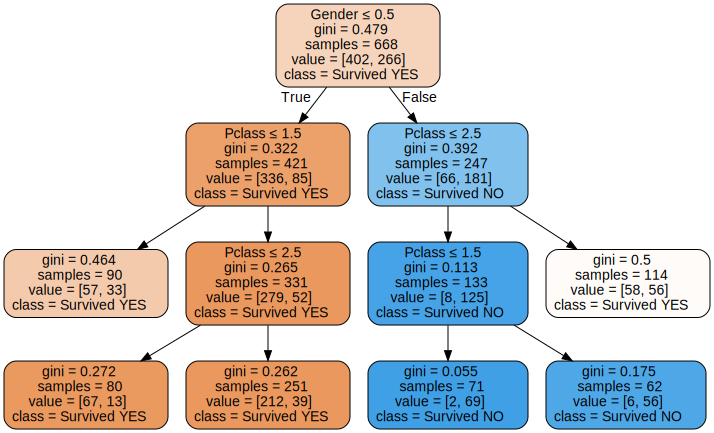

In [34]:
import graphviz
from sklearn import tree
ft_names=['Gender','Pclass']


dot_data = tree.export_graphviz(model, out_file=None, 
                      feature_names=ft_names,  
                      class_names=['Survived YES','Survived NO'],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

# Serialization

In [35]:
#converting an object of any class into a string form representation
#without losing information of any property of the object

In [36]:
import pickle

In [37]:


with open ('/home/harshit/Desktop/dtreemodel.txt','wb')  as f1 :
    pickle.dump( model, f1 )

# Deserialization


In [38]:
#loading from a file

with open ('/home/harshit/Desktop/dtreemodel.txt','rb')  as f1 :
    temp=pickle.load( f1 )


In [39]:
temp

DecisionTreeClassifier()

In [40]:
temp.predict(x_test)

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1])